In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pydataset import data
print(sns.get_dataset_names())

#url = get_db_url('iris_db')


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [34]:
iris = data('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


1. What does the distribution of petal lengths look like?

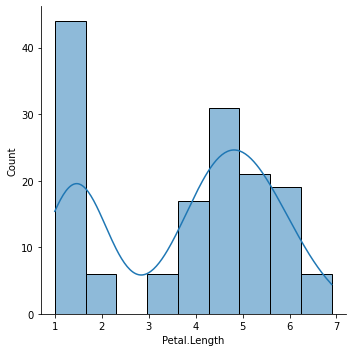

In [37]:
sns.displot(data = iris, x = "Petal.Length", kde=True)

2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

<AxesSubplot:>

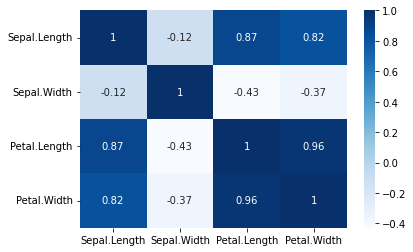

In [39]:
sns.heatmap(iris.corr(), annot = True, cmap = 'Blues')

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

No

In [41]:
#sns.catplot(data = iris, )
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

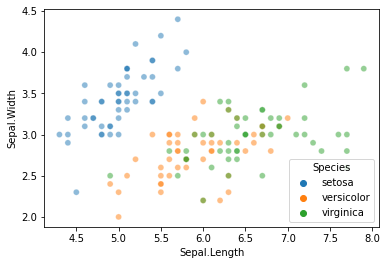

In [47]:
sns.scatterplot(data = iris, 
            x = 'Sepal.Length',
            y = 'Sepal.Width',
            hue = 'Species', 
            alpha = 0.5)

4. Which features would be best used to predict species?

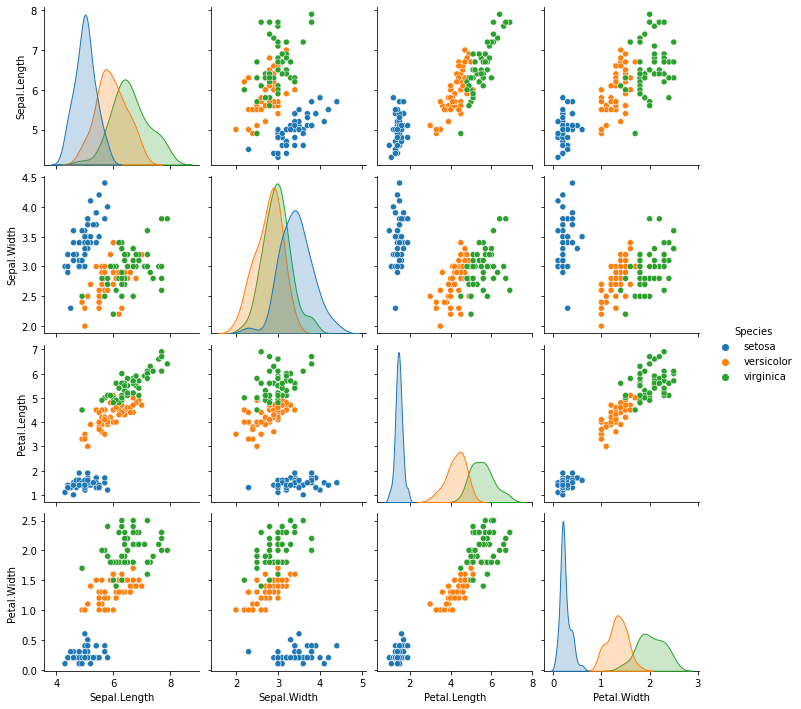

In [48]:
sns.pairplot(iris, hue = "Species")

Petal width is the best predictor

## Exercises 2

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [91]:
anscombe = sns.load_dataset('anscombe')

In [92]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [93]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [94]:
# anscombe = pd.DataFrame(anscombe)

In [102]:
anscombe.groupby('dataset')[['x', 'y']].agg(['sum', 'mean'])


x           y          
          sum mean    sum      mean
dataset                            
I        99.0  9.0  82.51  7.500909
II       99.0  9.0  82.51  7.500909
III      99.0  9.0  82.50  7.500000
IV       99.0  9.0  82.51  7.500909

In [101]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [103]:
sns.relplot(data = anscombe, x = 'x.count', y = 'y.count')

ValueError: Could not interpret value `x.count` for parameter `x`